# The Birthday Problem 

  

Surprised when somebody shares a birthday with you ? A common application of probability shows that it isn't that uncommon. 

The probability that at least two people will share a birthday is 1 minus the probability that none of them share a birthday. 

If there are n folk in a room, there are $365^n$ ways for them to have birthdays. 

There are $365*364*....(365-n)$ ways for them to have unique birthdays. 

Thus the probability that they have unique birthdays is $(365*364*....(365-n)) / (365^n)$ 

The probability that at least two of them have the same birthday is as discussed, $1 - (365*364*....(365-n)) / (365^n)$ 

This is graphed and analyzed below. Run the code by selecting the cell below and clicking run. 

Then use the slider to set the probability that at least one birthday collision occurs. You will see there are surprisingly few people required for a high probability of collision. For a probability of 50% of at least two people sharing a birthday, you need just 23 people. 




FloatSlider(value=0.5, description='Pick a probability for having a birthday collision', max=1.0, step=0.05)

<IPython.core.display.Javascript object>


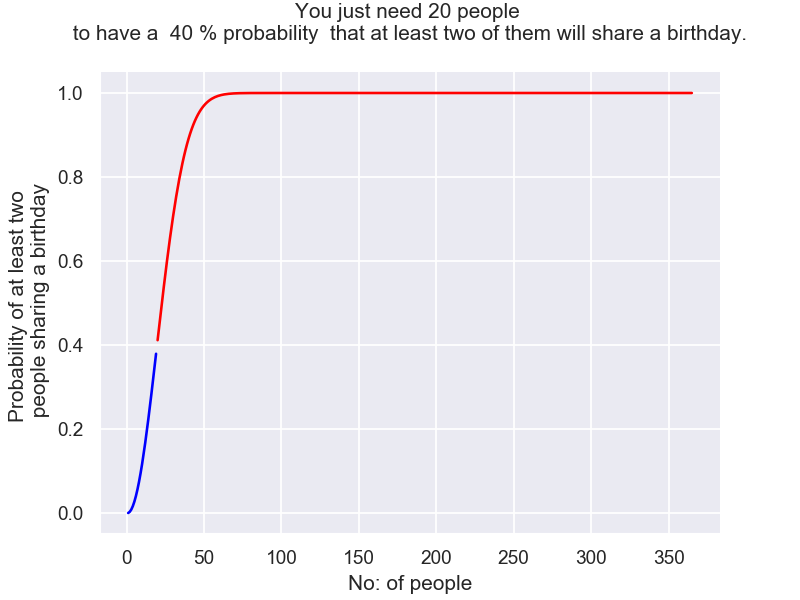

In [7]:
%matplotlib notebook 

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import ipywidgets as widgets
from IPython.display import clear_output




x = np.arange(1,366)
P_Birthday = np.zeros(365)

#Creating a helper function for number of permutations 
def nPr(n,k) : 
    nPr = 1
    for i in range(n,n - k,-1):
        nPr = nPr*i       
    return nPr


# calculating the probabilities
for i in range(1, 366) :     
    P_Birthday[i-1]= 1- nPr(365,i)  / pow(365,i)
    

    
#Visualizing the results 
sns.set() 

def plot_birthday (alpha) :
    
    plt.clf()
    alpha = alpha['new']
    
    min_people = np.amin(np.where(P_Birthday >= alpha)) + 1
    
    P_lower = np.ma.masked_where(P_Birthday >= alpha , P_Birthday)
    P_higher = np.ma.masked_where(P_Birthday < alpha , P_Birthday)
    plt.title("You just need {0} people \n to have a  {1:.0f} % probability  " 
          "that at least two of them will share a birthday. \n".format(min_people , alpha*100))
    plt.plot( x, P_lower, c = 'blue' )
    plt.plot( x, P_higher, c = 'red' )
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("No: of people")
    ax.set_ylabel("Probability of at least two \n people sharing a birthday")

    
prob_select = widgets.FloatSlider(
    value=0.5,
    min=0,
    max=1.0,
    step=0.05,
    description='Pick a probability for having a birthday collision',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)


 
display(prob_select)
prob_select.observe(plot_birthday, names = 'value')


